In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_api_df, format_df 

In [60]:

def format_years_certif(df):
    return df['YearsENERGYSTARCertified'].apply(lambda x: len(x)/4 if isinstance(x, str) else np.nan)

In [61]:
df = format_df(get_api_df())

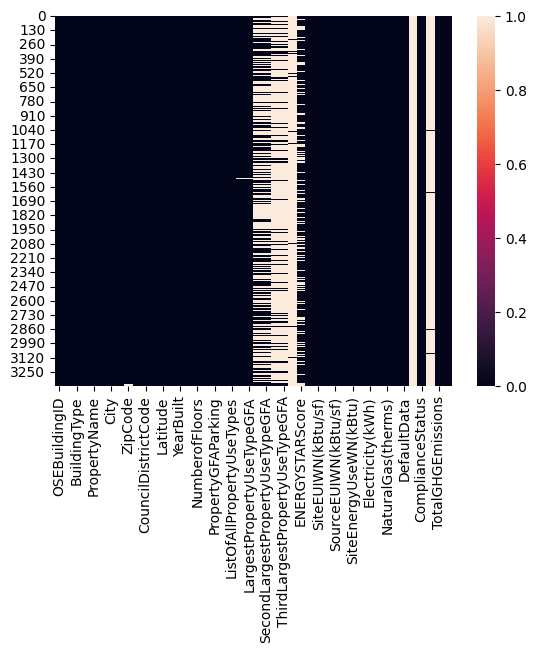

In [62]:
sns.heatmap(df.isna())
plt.show()

In [63]:
df['YearsENERGYSTARCertified'] = format_years_certif(df)

In [64]:
df['YearsENERGYSTARCertified'].sort_values(ascending=False)

577     15.0
230     13.0
207     10.0
225      9.0
273      9.0
        ... 
3371     NaN
3372     NaN
3373     NaN
3374     NaN
3375     NaN
Name: YearsENERGYSTARCertified, Length: 3376, dtype: float64

In [65]:
df['YearsENERGYSTARCertified'].describe()

count    119.000000
mean       3.058824
std        2.611234
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: YearsENERGYSTARCertified, dtype: float64

In [66]:
max_len = {}
for col in df.columns:
    if df[col].dtypes == object:
        max_len[col] = (max(df[col].apply(lambda x: len(x) if isinstance(x, str) else 0)))
    if df[col].dtypes != object:
        max_len[col] = max(df[col])
        

In [67]:
for key, value in max_len.items():
    print(f'Column : {key}, max_length : {value}')

Column : OSEBuildingID, max_length : 5
Column : DataYear, max_length : 2016
Column : BuildingType, max_length : 20
Column : PrimaryPropertyType, max_length : 27
Column : PropertyName, max_length : 72
Column : Address, max_length : 41
Column : City, max_length : 7
Column : State, max_length : 2
Column : ZipCode, max_length : 98272.0
Column : TaxParcelIdentificationNumber, max_length : 25
Column : CouncilDistrictCode, max_length : 7
Column : Neighborhood, max_length : 22
Column : Latitude, max_length : 47.73387
Column : Longitude, max_length : -122.2209659
Column : YearBuilt, max_length : 2015
Column : NumberofBuildings, max_length : 111.0
Column : NumberofFloors, max_length : 99
Column : PropertyGFATotal, max_length : 9320156
Column : PropertyGFAParking, max_length : 512608
Column : PropertyGFABuilding(s), max_length : 9320156
Column : ListOfAllPropertyUseTypes, max_length : 255
Column : LargestPropertyUseType, max_length : 52
Column : LargestPropertyUseTypeGFA, max_length : 9320156.0
C

In [68]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,True,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,True,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,True,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,True,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,True,NaN,Compliant,NaN,505.01,2.88


In [69]:
for col in df.columns:
    print(col)
    print(df[col].unique(), '\n')

OSEBuildingID
['1' '2' '3' ... '50224' '50225' '50226'] 

DataYear
[2016] 

BuildingType
['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA'] 

PrimaryPropertyType
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office'] 

PropertyName
['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center'] 

Address
['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St'] 


In [70]:
lower_cols = df.select_dtypes([object]).apply(lambda x: x.str.lower())
df[df.select_dtypes([object]).columns] = lower_cols

In [71]:
df.select_dtypes([object]).apply(lambda x: x.unique())

OSEBuildingID                    [1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 15, 16, 17,...
BuildingType                     [nonresidential, nonresidential cos, multifami...
PrimaryPropertyType              [hotel, other, mid-rise multifamily, mixed use...
PropertyName                     [mayflower park hotel, paramount hotel, 5673-t...
Address                          [405 olive way, 724 pine street, 1900 5th aven...
City                                                                     [seattle]
State                                                                         [wa]
TaxParcelIdentificationNumber    [0659000030, 0659000220, 0659000475, 065900064...
Neighborhood                     [downtown, southeast, northeast, east, central...
ListOfAllPropertyUseTypes        [hotel, hotel, parking, restaurant, hotel, par...
LargestPropertyUseType           [hotel, police station, other - entertainment/...
SecondLargestPropertyUseType     [nan, parking, office, restaurant, k-12 school...
Thir

In [72]:
len(df['Neighborhood'].unique())

14

In [73]:
df[df.duplicated(['Neighborhood'], keep=False)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,nonresidential,hotel,mayflower park hotel,405 olive way,seattle,wa,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,True,NaN,compliant,NaN,249.98,2.83
1,2,2016,nonresidential,hotel,paramount hotel,724 pine street,seattle,wa,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,True,NaN,compliant,NaN,295.86,2.86
2,3,2016,nonresidential,hotel,5673-the westin seattle,1900 5th avenue,seattle,wa,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,True,NaN,compliant,NaN,2089.28,2.19
3,5,2016,nonresidential,hotel,hotel max,620 stewart st,seattle,wa,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,True,NaN,compliant,NaN,286.43,4.67
4,8,2016,nonresidential,hotel,warwick seattle hotel (id8),401 lenora st,seattle,wa,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,True,NaN,compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,nonresidential cos,office,horticulture building,1600 s dakota st,seattle,wa,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,error - correct default data,NaN,20.94,1.70
3372,50223,2016,nonresidential cos,other,international district/chinatown cc,719 8th ave s,seattle,wa,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,True,NaN,compliant,NaN,32.17,2.01
3373,50224,2016,nonresidential cos,other,queen anne pool,1920 1st ave w,seattle,wa,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,True,NaN,compliant,NaN,223.54,16.99
3374,50225,2016,nonresidential cos,mixed use property,south park community center,8319 8th ave s,seattle,wa,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,True,NaN,compliant,NaN,22.11,1.57


In [74]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [75]:
from ydata_profiling import ProfileReport

In [76]:
cols = ['BuildingType', 'PrimaryPropertyType','ZipCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 
       'Electricity(kBtu)','NaturalGas(kBtu)', 'ComplianceStatus',
       'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

df_profiled = df[cols]

In [77]:
profile = ProfileReport(df_profiled, title="Profiling Report")
profile.to_file("report.html")

/home/dakoro/Data_IA/TP/CO2_Manuel_David/co2/lib/python3.9/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Colonnes à droper 
- City (1 valeur = Seattle)
- State (1 valeur = WA)
- Comments